In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.drop(['MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','NumWebVisitsMonth',
       'MntGoldProds', 'NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6


In [7]:
df.shape

(2240, 13)

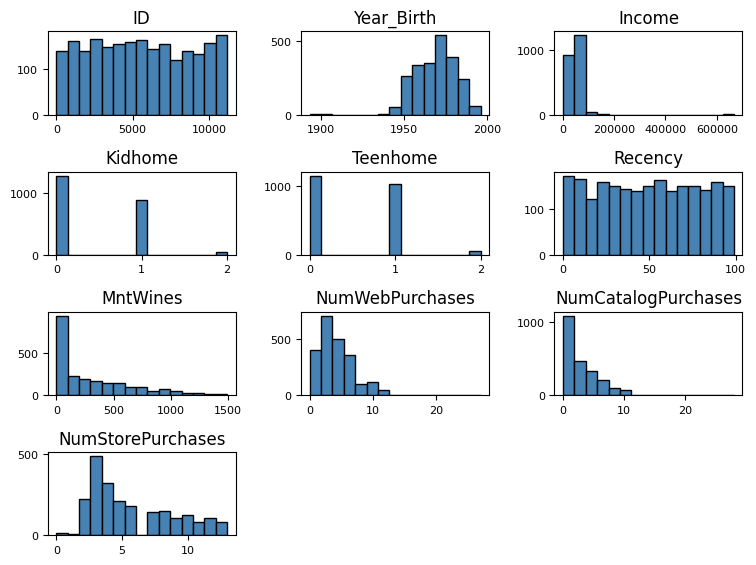

In [8]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

In [9]:
df.drop(df[df['Income'] > 666665.0].index, inplace=True)

In [10]:
df.loc[df['Income'] > 666665.0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases


## Convertimos el año de nacimiento a categorías de 25 años

In [11]:
df['Year_Birth'].describe()

count    2239.000000
mean     1968.802144
std        11.985494
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [12]:
# convertir la columna "año" a tipo numérico
#df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')

# obtener el rango de años
min_year = df['Year_Birth'].min()
max_year = df['Year_Birth'].max()

# establecer los límites del rango de años para cada categoría
year_range = (max_year - min_year) / 3
cat1_max = min_year + year_range
cat2_max = min_year + year_range*2

# obtener los límites del rango de años de 25 años
year_range = 25
num_ranges = int(np.ceil((max_year - min_year) / year_range))
prop_range = np.linspace(min_year, min_year + year_range * num_ranges, num=num_ranges+1)

# reemplazar cada año con su rango de 25 años
df['Year_cat'] = pd.cut(df['Year_Birth'], bins=prop_range, labels=[f"{int(prop_range[i])}-{int(prop_range[i+1])-1}" for i in range(len(prop_range)-1)])

# imprimir los resultados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992


In [13]:
#df.loc[df['Year_Birth'] == 1996]

In [14]:
df['Year_cat'].value_counts()

Year_cat
1968-1992    1224
1943-1967     993
1993-2017      10
1918-1942       9
1893-1917       2
Name: count, dtype: int64

In [15]:
df.dtypes

ID                        int64
Year_Birth                int64
Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
Year_cat               category
dtype: object

In [16]:
X = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [17]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,Graduation,Single,58138.0,0,0,58,635,8,10,4,1943-1967
1,Graduation,Single,46344.0,1,1,38,11,1,1,2,1943-1967
2,Graduation,Together,71613.0,0,0,26,426,8,2,10,1943-1967
3,Graduation,Together,26646.0,1,0,26,11,2,0,4,1968-1992
4,PhD,Married,58293.0,1,0,94,173,5,3,6,1968-1992


In [18]:
X.Year_cat = X.Year_cat.astype('object')

In [19]:
X.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Year_cat                object
dtype: object

In [20]:
# Checking Null values
X.isnull().sum()*100/X.shape[0]

Education              0.000000
Marital_Status         0.000000
Income                 1.071907
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntWines               0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
Year_cat               0.044663
dtype: float64

In [21]:
# identificar los índices de las filas con valores NaN
nan_indices = X[X.isna().any(axis=1)].index

# eliminar las filas con valores NaN
X = X.drop(nan_indices)
df = df.drop(nan_indices)

In [22]:
# Checking Null values
X.isnull().sum()*100/X.shape[0]

Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Recency                0.0
MntWines               0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
Year_cat               0.0
dtype: float64

In [23]:
df.shape

(2214, 14)

In [24]:
X.shape

(2214, 11)

In [25]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include="object")

In [26]:
X_num.head()

,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,58138.0,0,0,58,635,8,10,4
1,46344.0,1,1,38,11,1,1,2
2,71613.0,0,0,26,426,8,2,10
3,26646.0,1,0,26,11,2,0,4
4,58293.0,1,0,94,173,5,3,6


In [27]:
X_cat.head()

,Education,Marital_Status,Year_cat
0,Graduation,Single,1943-1967
1,Graduation,Single,1943-1967
2,Graduation,Together,1943-1967
3,Graduation,Together,1968-1992
4,PhD,Married,1968-1992


## Fin limpieza --> Encoding y Escalado

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_cat2 = X_cat.apply(le.fit_transform)
X_cat2.head()

,Education,Marital_Status,Year_cat
0,2,4,2
1,2,4,2
2,2,5,2
3,2,5,3
4,4,3,3


In [29]:
# estandarizar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [30]:
X_scaled

array([[ 0.28672113, -0.82289655, -0.92891607, ...,  1.4276807 ,
         2.50356726, -0.55507448],
       [-0.26118431,  1.03997969,  0.90899294, ..., -1.12642244,
        -0.57164426, -1.17046502],
       [ 0.91271958, -0.82289655, -0.92891607, ...,  1.4276807 ,
        -0.22995409,  1.29109713],
       ...,
       [ 0.2329712 , -0.82289655, -0.92891607, ..., -0.76155056,
         0.11173608,  2.21418293],
       [ 0.8027111 , -0.82289655,  0.90899294, ...,  0.69793694,
         0.79511642,  1.29109713],
       [ 0.04194296,  1.03997969,  0.90899294, ..., -0.39667868,
        -0.57164426, -0.55507448]])

In [31]:
X_scaled2 = pd.DataFrame(data= X_scaled, columns = X_num.columns)

In [32]:
# resetear los índices de ambos DataFrames
X_scaled2 = X_scaled2.reset_index(drop=True)
X_cat2 = X_cat2.reset_index(drop=True)

In [33]:
# unir los datos codificados
X_both = pd.concat([X_scaled2, X_cat2], axis=1)
X_final = pd.DataFrame(X_both, columns = X.columns)
# establecer el índice en la columna adecuada
#X_final = X_final.set_index('Index')

In [34]:
X_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,2,4,0.286721,-0.822897,-0.928916,0.309693,0.977332,1.427681,2.503567,-0.555074,2
1,2,4,-0.261184,1.039980,0.908993,-0.381288,-0.872729,-1.126422,-0.571644,-1.170465,2
2,2,5,0.912720,-0.822897,-0.928916,-0.795877,0.357680,1.427681,-0.229954,1.291097,2
3,2,5,-1.176280,1.039980,-0.928916,-0.795877,-0.872729,-0.761551,-0.913334,-0.555074,3
4,4,3,0.293922,1.039980,-0.928916,1.553461,-0.392425,0.333065,0.111736,0.060316,3


In [35]:
# Checking Null values
X_final.isnull().sum()*100/X_final.shape[0]

Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Recency                0.0
MntWines               0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
Year_cat               0.0
dtype: float64

In [36]:
X_final.loc[X_final.isnull().any(axis=1)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat


## Gaussian Mixture

## Creamos el método de distancia de Gower para calcular bien distancias de datos numéricos y categóricos.

In [37]:
def gower_distance(x, y):
    # Inicializar la distancia
    distance = 0
    
    # Calcular la distancia de Manhattan para variables numéricas
    for i in range(len(x)):
        if np.issubdtype(type(x[i]), np.number) and np.issubdtype(type(y[i]), np.number):
            distance += abs(x[i] - y[i])
        elif x[i] != y[i]:  # Calcular la distancia de Hamming para variables categóricas
            distance += 1
    
    return distance

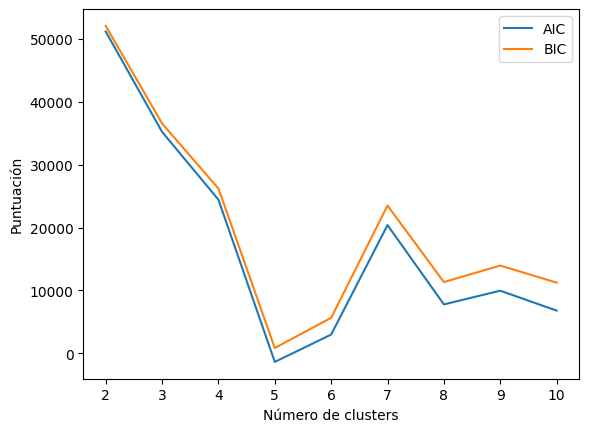

In [38]:
# ajustar el modelo Gaussian Mixture para diferentes valores de k y calcular el AIC y el BIC
n_clusters = range(2, 11)
aic_scores = []
bic_scores = []
for n in n_clusters:
    gm = GaussianMixture(n_components=n, covariance_type="full", init_params='kmeans', random_state=42)
    gm.fit(X_final)
    aic_scores.append(gm.aic(X_final))
    bic_scores.append(gm.bic(X_final))

# trazar los resultados del AIC y el BIC
fig, ax = plt.subplots()
ax.plot(n_clusters, aic_scores, label='AIC')
ax.plot(n_clusters, bic_scores, label='BIC')
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Puntuación')
ax.legend()
plt.show()

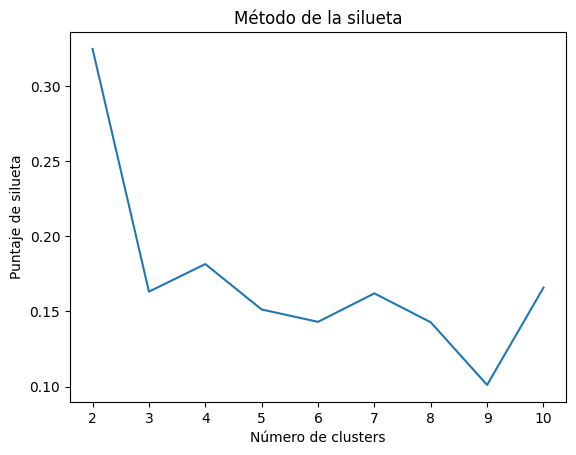

In [39]:
# aplicar el método de la silueta para determinar el número óptimo de clusters
silhouette_scores = []
for n in n_clusters:
    gm = GaussianMixture(n_components=n, covariance_type="full", init_params='kmeans', random_state=42)
    gm.fit(X_final)
    labels = gm.predict(X_final)
    silhouette_scores.append(silhouette_score(X_final, labels, metric=gower_distance))
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de silueta')
plt.title('Método de la silueta')
plt.show()

In [40]:
# entrenar el modelo de clustering
n_clusters = 5

# ajustar el modelo Gaussian Mixture con el número óptimo de clusters
gm = GaussianMixture(n_components=n_clusters, random_state=42)
gm.fit(X_final)

# predecir las etiquetas de cluster para los datos
labels = gm.predict(X_final)

In [41]:
# crear un dataframe con las etiquetas de cluster
clusters_df = pd.DataFrame(labels, columns=['Cluster'])

# restablecer los índices de los dataframes
df = df.reset_index(drop=True)
clusters_df = clusters_df.reset_index(drop=True)

# concatenar los dataframes
result = pd.concat([df, clusters_df], axis=1)

In [42]:
result.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,4
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,2


In [43]:
result['Cluster'].value_counts()

Cluster
4    630
0    617
2    456
3    378
1    133
Name: count, dtype: int64

In [44]:
'''for i in range(0,5):
  print('Customer IDs for cluster:', i) 
  print(result[result['Cluster'] == i]['ID'].values)
  print()'''

"for i in range(0,5):\n  print('Customer IDs for cluster:', i) \n  print(result[result['Cluster'] == i]['ID'].values)\n  print()"

In [45]:
import plotly.express as px
fig = px.scatter(result, x=result['Education'], y=result['Income'], color=result["Cluster"])
fig.show()

In [46]:
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='Education', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

In [47]:
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

In [48]:
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Marital_Status', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

In [49]:
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Marital_Status', z='Year_cat', color='Cluster',title="Wine Customers")
fig.show()

## K-PROTOTYPES

In [50]:
!pip install kmodes

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.10/bin/python3.10: no such file or directory
Defaulting to user installation because normal site-packages is not writeable


In [51]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
# Crear una lista de objetos kprototypes para diferentes valores de k
costs = []
silhouette_scores = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X_final, categorical=[0, 1, 10])
    costs.append(kproto.cost_)
    silhouette_scores.append(silhouette_score(X_final, clusters, metric=gower_distance))

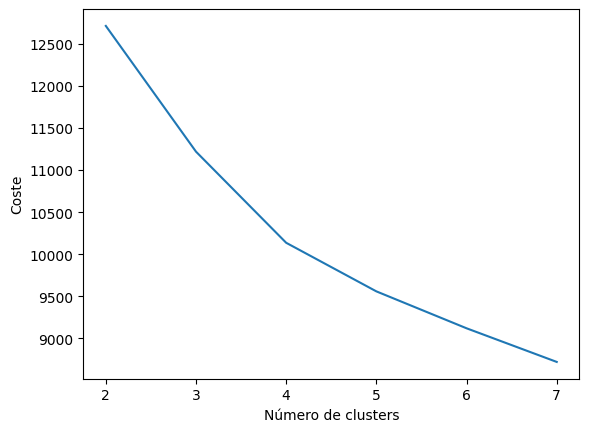

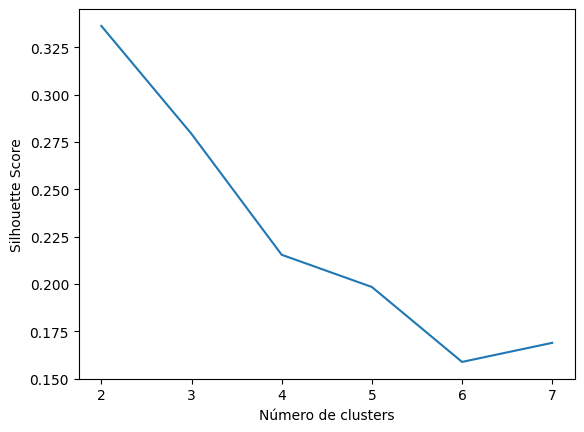

In [53]:
# Plotear la curva del codo (elbow method)
plt.plot(range(2, 8), costs)
plt.xlabel('Número de clusters')
plt.ylabel('Coste')
plt.show()

# Plotear la curva de silhouette score
plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [54]:
# Escoger el número óptimo de clusters según la curva del codo y entrenar el modelo final
kproto_final = KPrototypes(n_clusters=4, init='Cao', verbose=0)
clusters_final = kproto_final.fit_predict(X_final, categorical=[0, 1, 10])

In [55]:
print(kproto.cluster_centroids_)

[[ 0.39646401 -0.46959244  0.69985157 -0.94038798  0.33141542  0.9684454
   0.05753695  0.6353879   2.          3.          2.        ]
 [-0.74741381 -0.82289655 -0.01662066 -0.02866234 -0.72316588 -0.66240059
  -0.61745055 -0.63645765  2.          3.          2.        ]
 [ 1.12277369 -0.73265341 -0.89075879  0.0958238   0.31096049  0.01995702
   1.20065181  0.47341558  2.          3.          3.        ]
 [ 0.44750059 -0.66491411  1.06485801  0.83855089  0.61004751  0.87199243
   0.3471763   0.689841    2.          3.          2.        ]
 [ 1.14821792 -0.69722633 -0.62989119 -0.02099072  1.86731336  0.67766628
   1.19104312  1.18853204  2.          3.          3.        ]
 [-0.52096852  1.18206347  0.99725411  0.03281272 -0.72206672 -0.6574487
  -0.69422802 -0.74108235  2.          3.          2.        ]
 [-0.98880994  1.10736032 -0.92891607  0.0197751  -0.79570013 -0.61404916
  -0.73594634 -0.80384938  2.          3.          3.        ]]


In [56]:
clusters_final = pd.DataFrame(clusters_final)
df_proto = pd.concat([df, clusters_final], axis =1)
df_proto = df_proto.rename(columns = {0:"Cluster"})
df_proto.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,3
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,0


In [57]:
df_proto['Cluster'].value_counts()

Cluster
0    610
2    557
3    533
1    514
Name: count, dtype: int64

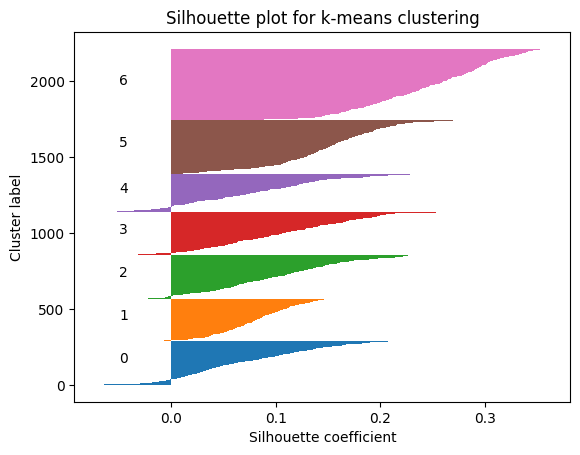

In [58]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(X_final, kproto.labels_)

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kproto.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kproto.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

In [59]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_proto, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

## DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
from sklearn.neighbors import NearestNeighbors
# Encontrar las distancias k
k = 8
neighbors = NearestNeighbors(n_neighbors=k, metric=gower_distance) #le pasamos la distancia de Gower que hemos creado
neighbors_fit = neighbors.fit(X_final)
distances, _ = neighbors_fit.kneighbors(X_final)

In [62]:
# Ordenar las distancias
distances_sorted = np.sort(distances, axis=0)
distances_mean = distances_sorted.mean(axis=1)

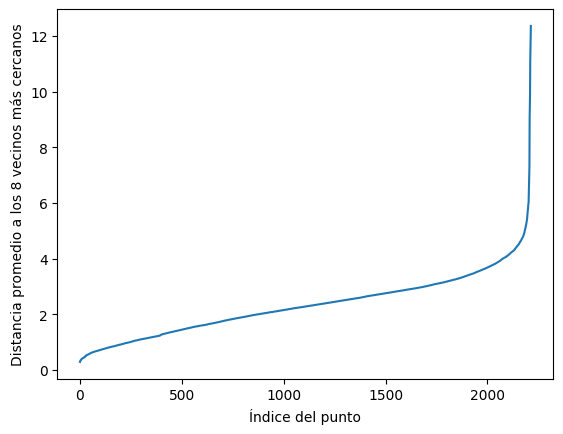

In [63]:
# Graficar las distancias k
plt.plot(distances_mean)
plt.xlabel('Índice del punto')
plt.ylabel(f'Distancia promedio a los {k} vecinos más cercanos')
plt.show()

In [64]:
# Definir el espacio de búsqueda para eps y min_samples
eps_values = np.arange(1, 8, 0.2) # rango e incremento
min_samples_values = np.arange(3, 10, 1) # rango e incremento

# Realizar la búsqueda en malla (grid search)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_final)
        
        # Ignorar resultados con solo un cluster o clusters asignados como ruido
        if len(np.unique(clusters)) > 1 and np.any(clusters == -1):
            score = silhouette_score(X_final, clusters)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Imprimir los mejores valores de eps y min_samples
print(f"Mejores parámetros: {best_params}, Mejor coeficiente de silueta: {best_score}")

Mejores parámetros: {'eps': 6.599999999999999, 'min_samples': 9}, Mejor coeficiente de silueta: 0.5749678471394798


In [65]:
# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan2 = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters2 = dbscan2.fit_predict(X_final)

In [66]:
cl3=pd.DataFrame(dbscan2.labels_,columns=['Cluster'])

In [67]:
cl3.value_counts()

Cluster
 0         2210
-1            4
Name: count, dtype: int64

In [68]:
df_DB = pd.concat([df,cl3],axis=1)

In [69]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_DB, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()